In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel(r"C:\Users\Shuba\Downloads\Cars.xlsx")

C:\Users\Shuba\AppData\Local\Temp\ipykernel_9596\4204472797.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,7495,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,10989,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,27990,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,12495,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,7999,Manual,19353,Petrol,125,54.3,1.2,ford


In [3]:
df["price"]=df["price"]*82.89

In [4]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer
0,I10,2017,621260.55,Manual,11630,Petrol,145,60.1,1.0,hyundi
1,Polo,2017,910878.21,Manual,9200,Petrol,145,58.9,1.0,volkswagen
2,2 Series,2019,2320091.10,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW
3,Yeti Outdoor,2017,1035710.55,Manual,30960,Diesel,150,62.8,2.0,skoda
4,Fiesta,2017,663037.11,Manual,19353,Petrol,125,54.3,1.2,ford


# convert miles to km * 1.60934
# convert gallons to liter /3.78541

In [5]:
df["kmpl"]= (df["mpg"]*1.60934)/3.78541


In [6]:
df

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,Manufacturer,kmpl
0,I10,2017,621260.55,Manual,11630,Petrol,145,60.1,1.0,hyundi,25.551085
1,Polo,2017,910878.21,Manual,9200,Petrol,145,58.9,1.0,volkswagen,25.040914
2,2 Series,2019,2320091.10,Semi-Auto,1614,Diesel,145,49.6,2.0,BMW,21.087085
3,Yeti Outdoor,2017,1035710.55,Manual,30960,Diesel,150,62.8,2.0,skoda,26.698971
4,Fiesta,2017,663037.11,Manual,19353,Petrol,125,54.3,1.2,ford,23.085257


In [7]:
df.drop("mileage", axis=1,inplace=True)

In [8]:
df

,model,year,price,transmission,fuelType,tax,mpg,engineSize,Manufacturer,kmpl
0,I10,2017,621260.55,Manual,Petrol,145,60.1,1.0,hyundi,25.551085
1,Polo,2017,910878.21,Manual,Petrol,145,58.9,1.0,volkswagen,25.040914
2,2 Series,2019,2320091.10,Semi-Auto,Diesel,145,49.6,2.0,BMW,21.087085
3,Yeti Outdoor,2017,1035710.55,Manual,Diesel,150,62.8,2.0,skoda,26.698971
4,Fiesta,2017,663037.11,Manual,Petrol,125,54.3,1.2,ford,23.085257


In [12]:
df.drop("mpg",axis=1,inplace=True)
df

KeyError: "['mpg'] not found in axis"

In [13]:
df

,model,year,price,transmission,fuelType,tax,engineSize,Manufacturer,kmpl
0,I10,2017,621260.55,Manual,Petrol,145,1.0,hyundi,25.551085
1,Polo,2017,910878.21,Manual,Petrol,145,1.0,volkswagen,25.040914
2,2 Series,2019,2320091.10,Semi-Auto,Diesel,145,2.0,BMW,21.087085
3,Yeti Outdoor,2017,1035710.55,Manual,Diesel,150,2.0,skoda,26.698971
4,Fiesta,2017,663037.11,Manual,Petrol,125,1.2,ford,23.085257


In [14]:
df[df["Manufacturer"] =="skoda"]

,model,year,price,transmission,fuelType,tax,engineSize,Manufacturer,kmpl
3,Yeti Outdoor,2017,1035710.55,Manual,Diesel,150,2.0,skoda,26.698971


In [15]:
df[(df["year"]>2010)&(df["year"]<2020)]

,model,year,price,transmission,fuelType,tax,engineSize,Manufacturer,kmpl
0,I10,2017,621260.55,Manual,Petrol,145,1.0,hyundi,25.551085
1,Polo,2017,910878.21,Manual,Petrol,145,1.0,volkswagen,25.040914
2,2 Series,2019,2320091.10,Semi-Auto,Diesel,145,2.0,BMW,21.087085
3,Yeti Outdoor,2017,1035710.55,Manual,Diesel,150,2.0,skoda,26.698971
4,Fiesta,2017,663037.11,Manual,Petrol,125,1.2,ford,23.085257


In [17]:
df["transmission"].value_counts()

transmission
Manual       4
Semi-Auto    1
Name: count, dtype: int64

In [18]:
df["fuelType"].value_counts()

fuelType
Petrol    3
Diesel    2
Name: count, dtype: int64

In [20]:
df.groupby(["transmission","fuelType"])["price"].mean().sort_values(ascending=False)

transmission  fuelType
Semi-Auto     Diesel      2320091.10
Manual        Diesel      1035710.55
              Petrol       731725.29
Name: price, dtype: float64

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         5 non-null      object 
 1   year          5 non-null      int64  
 2   price         5 non-null      float64
 3   transmission  5 non-null      object 
 4   fuelType      5 non-null      object 
 5   tax           5 non-null      int64  
 6   engineSize    5 non-null      float64
 7   Manufacturer  5 non-null      object 
 8   kmpl          5 non-null      float64
dtypes: float64(3), int64(2), object(4)
memory usage: 492.0+ bytes


In [22]:
pd.crosstab(["transmission"],["fuelType"])

col_0,fuelType
row_0,
transmission,1


In [28]:
np.round(pd.pivot_table(df, index="model", columns="fuelType", values="kmpl", fill_value=0), decimals=2)

fuelType,Diesel,Petrol
model,,
2 Series,21.09,0.00
Fiesta,0.00,23.09
I10,0.00,25.55
Polo,0.00,25.04
Yeti Outdoor,26.70,0.00


In [31]:
df["price"] = df["price"].astype(int)

In [32]:
df

,model,year,price,transmission,fuelType,tax,engineSize,Manufacturer,kmpl
0,I10,2017,621260,Manual,Petrol,145,1.0,hyundi,25.551085
1,Polo,2017,910878,Manual,Petrol,145,1.0,volkswagen,25.040914
2,2 Series,2019,2320091,Semi-Auto,Diesel,145,2.0,BMW,21.087085
3,Yeti Outdoor,2017,1035710,Manual,Diesel,150,2.0,skoda,26.698971
4,Fiesta,2017,663037,Manual,Petrol,125,1.2,ford,23.085257


In [33]:
df["model"].value_counts()

model
I10             1
Polo            1
2 Series        1
Yeti Outdoor    1
Fiesta          1
Name: count, dtype: int64

In [39]:
df.groupby("model")["price"].mean().head(10)

model
2 Series        2320091.0
Fiesta           663037.0
I10              621260.0
Polo             910878.0
Yeti Outdoor    1035710.0
Name: price, dtype: float64

<Axes: xlabel='model', ylabel='price'>

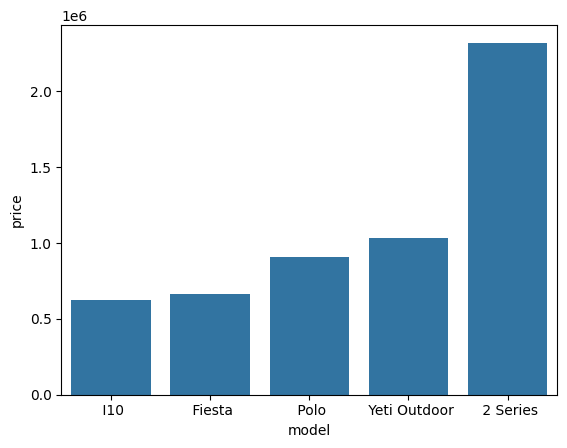

In [43]:
sns.barplot(df.groupby("model")["price"].mean().sort_values().head(10))

In [44]:
df.groupby("transmission")["price"].mean().sort_values().head()

transmission
Manual        807721.25
Semi-Auto    2320091.00
Name: price, dtype: float64

<Axes: xlabel='transmission', ylabel='price'>

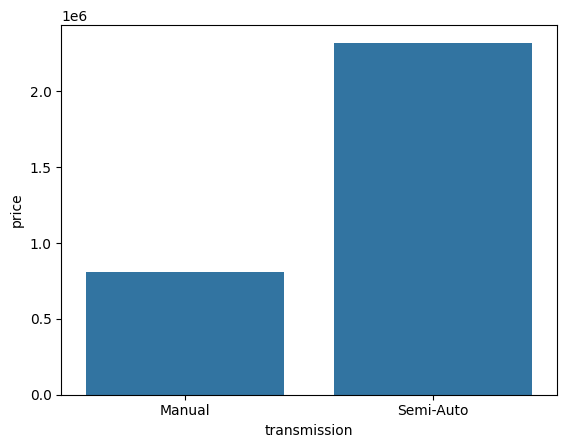

In [45]:
sns.barplot(df.groupby("transmission")["price"].mean().sort_values().head())

In [49]:
df.groupby(["model","transmission"])["kmpl"].mean().sort_values(ascending=False).head()

model         transmission
Yeti Outdoor  Manual          26.698971
I10           Manual          25.551085
Polo          Manual          25.040914
Fiesta        Manual          23.085257
2 Series      Semi-Auto       21.087085
Name: kmpl, dtype: float64

In [50]:
df.groupby(["model","fuelType"])["kmpl"].mean().sort_values(ascending=False).head()

model         fuelType
Yeti Outdoor  Diesel      26.698971
I10           Petrol      25.551085
Polo          Petrol      25.040914
Fiesta        Petrol      23.085257
2 Series      Diesel      21.087085
Name: kmpl, dtype: float64

In [53]:
model_fuel_kmpl=pd.pivot_table(df,index="model", columns="fuelType", values="kmpl", fill_value=0)

<Axes: xlabel='model'>

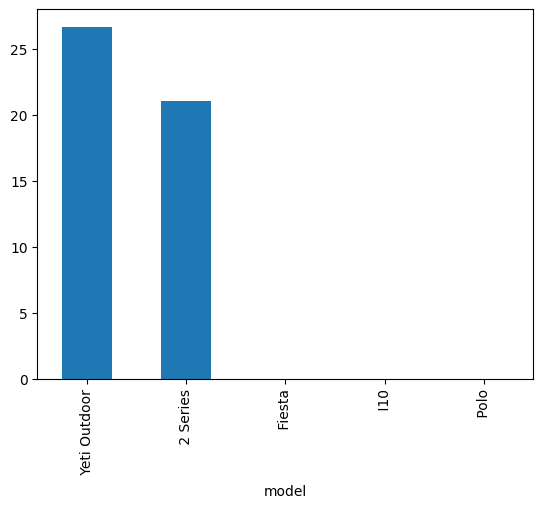

In [57]:
model_fuel_kmpl.sort_values("Diesel", ascending=False)["Diesel"].head().plot.bar()

<Axes: ylabel='price'>

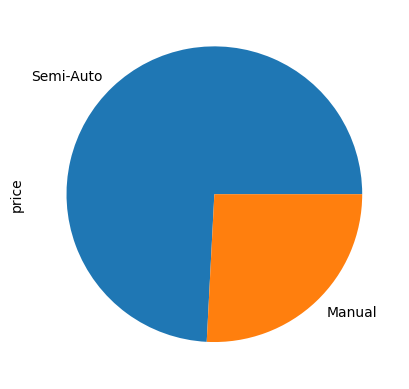

In [61]:
df.groupby(["transmission"])["price"].mean().sort_values(ascending=False).head().plot.pie()

<Axes: xlabel='transmission'>

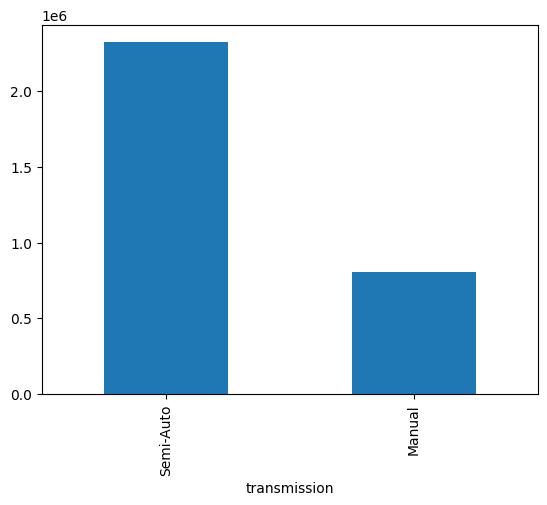

In [75]:
df.groupby("transmission")["price"].mean().sort_values(ascending=False).head().plot.bar()

In [66]:
pd.crosstab(df["transmission"],df["fuelType"])

fuelType,Diesel,Petrol
transmission,,
Manual,1,3
Semi-Auto,1,0


In [68]:
pd.pivot_table(df,index="fuelType",columns="model",values="price",fill_value=0)

model,2 Series,Fiesta,I10,Polo,Yeti Outdoor
fuelType,,,,,
Diesel,2320091.0,0.0,0.0,0.0,1035710.0
Petrol,0.0,663037.0,621260.0,910878.0,0.0


In [70]:
df[df["Manufacturer"]=="skoda"]

,model,year,price,transmission,fuelType,tax,engineSize,Manufacturer,kmpl
3,Yeti Outdoor,2017,1035710,Manual,Diesel,150,2.0,skoda,26.698971


In [71]:
df[(df["year"]>2010)&(df["year"]<2020)]

,model,year,price,transmission,fuelType,tax,engineSize,Manufacturer,kmpl
0,I10,2017,621260,Manual,Petrol,145,1.0,hyundi,25.551085
1,Polo,2017,910878,Manual,Petrol,145,1.0,volkswagen,25.040914
2,2 Series,2019,2320091,Semi-Auto,Diesel,145,2.0,BMW,21.087085
3,Yeti Outdoor,2017,1035710,Manual,Diesel,150,2.0,skoda,26.698971
4,Fiesta,2017,663037,Manual,Petrol,125,1.2,ford,23.085257


In [72]:
df.groupby("transmission")["kmpl"].mean()

transmission
Manual       25.094057
Semi-Auto    21.087085
Name: kmpl, dtype: float64

In [73]:
df.groupby("fuelType")["kmpl"].mean()

fuelType
Diesel    23.893028
Petrol    24.559085
Name: kmpl, dtype: float64

In [74]:
df.groupby("Manufacturer")["kmpl"].mean()

Manufacturer
BMW           21.087085
ford          23.085257
hyundi        25.551085
skoda         26.698971
volkswagen    25.040914
Name: kmpl, dtype: float64